###### [Home](https://github.com/jorgeo80/UP_MCD/blob/master/MachineLearning/Directorio.md)
# Descenso de Gradiente Estocástico (SGD) 
&emsp;&emsp;$\theta = \theta - \eta * \nabla \theta J( \theta; x(i); y(i))$

## (0) Importamos las librerias y preparamos las funciones básicas

In [2]:
def regresion_lineal(x,b):
    return np.array(b[0] + b[1]*x).reshape(1,-1)

# Definir la función de error cuadrático medio
def error_cuadratico(y, y_pred):
    return np.mean((y - y_pred) ** 2)   

# Definir la función de gradiente del error
def grad_error(y, y_pred, x):
    return np.array([-2 * np.mean((y - y_pred)), -2 * np.mean((y - y_pred) * x)])

## (1) Generamos la función SDG

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sgd(X, y, eta = 0.01 ,n_iter = 100):
    '''
        función para calcular el Descenso de Gradiente Estocástico
        X = Matriz de X's
        y = Vector de y's
        eta = Tasa de Aprendizaje
        n_iter = Numero de Iteraciones        
    '''
    
    # Inicializamos los parámetros ws
    w = np.random.rand((X.shape[1]+1))
    # Sacamos la longitud del vector y
    m = len(y)
    # Creamos 2 vectores vacios para asignar las ws y los costos
    cost_hist = []    
    w_hist = []
    
    # Generamos un loop que correra por cada una de las iteraciones definidas
    for it in range(n_iter):
        # Inicializamos el error cuadratico medio --> Costo
        cost = 0.0
        # Hacemos un loop que seleccione aleatoriamente los elementos a evaluar
        for i in range(m):
            # Seleccion aletoria de X, y
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            # Y estimada
            y_i_pred = regresion_lineal(X_i,w)
            # Gradiente del error
            g = grad_error(y_i, y_i_pred, X)
            # Actualización de las ws
            w = w - eta * g
            # Error cuadrático medio
            cost += (1 / 2) * error_cuadratico(y_i, y_i_pred)
        # Guardamos los resultados de cada iteración para las ws y el costo    
        cost_hist.append(float(cost)) 
        w_hist.append(w)
    # Retornamos los resultados en un objeto que contenga la w final, 
    # el historico de los costos y el historico de las ws por cada una de las iteraciones
    return {'w': w, 
            'costHistory': cost_hist, 
            'wHistory': w_hist}

## (2) Creamos datos dummy y los graficamos

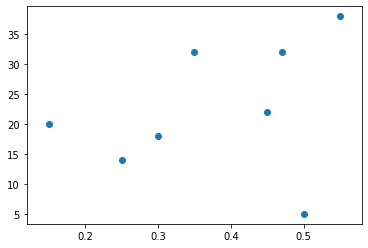

In [4]:
X = np.array([0.5, 0.15, 0.30, 0.25, 0.35, 0.45, 0.47, 0.55]).reshape((-1, 1))
y = np.array([5, 20, 18, 14, 32, 22, 32, 38])

plt.scatter(X,y)

## (3) Creamos la función e Imprimimos las ws

In [5]:
wSGD = sgd(X, y, eta = 0.01 ,n_iter = 100)
print(wSGD['w'])

[18.48317631  7.54405553]


## (4) Evaluación del Método

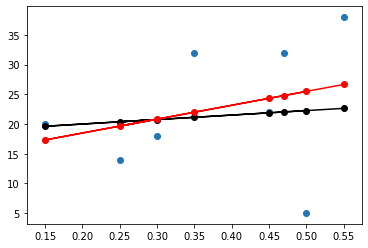

In [7]:
# Usando el modelo programado
y_pred = regresion_lineal(X,wSGD['w'])

# Usando el modelo de sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
y_pred_sk = model.predict(X)

plt.plot(X,y_pred[0,],marker='o',color='black')
plt.plot(X,y_pred_sk,marker='o',color='red')
plt.scatter(X,y)

### Funtes consultadas:
* [Stochastic Gradient Descent - Andrew Ng](https://www.youtube.com/watch?v=W9iWNJNFzQI)
* [Stochastic Gradient Descent](https://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent)
* [Gradient Descent in Python](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f)
* [Conceptos Fundamentales en ML](https://planetachatbot.com/conceptos-fundamentales-en-machine-learning-funci%C3%B3n-de-perdida-y-optimizaci%C3%B3n-e30c25404622)